## Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Loading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\database_IND.csv")
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


### Information about the dataset:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


## Exploratory Data Analysis

In [4]:
df.shape

(908, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


### From our preliminary analysis of this dataset, we are able to draw the following conclusions:
    
    1. There are 908 rows and 25 columns(24 features and 1 target variable). Here, we have to make two predictions
       -- Primary Fuel   
       -- capacity_mw 
    2. Atleast 4 of the 24 features(other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh) are mostly empty and can be dropped before we proceed any further with our analysis
    3. Except these features, there are a few features(country,country_long,year_of_capacity_data,generation_data_source) which have the only one value and will not impact the accuracy of the algorithm and can we dropped before moving on
    

In [9]:
#dropping unwanted columns to make the analysis easier
df.drop(['estimated_generation_gwh','other_fuel3','other_fuel2','year_of_capacity_data'],axis=1,inplace=True)
df.drop(['wepp_id','country','country_long','name','url',],axis=1,inplace=True)

In [10]:
df.shape

(908, 16)

In [11]:
df.isnull().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

After dropping 9 columns, we can move ahead with our analysis. We need to analyze 'other_fuel1' as a majority of this column is also null. We also need to look at few of the columns which has lot of null values - generation_gwh_2013,generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, and generation_gwh_2017

In [12]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [13]:
#dropping these 3 columns as we are not getting any major information from these columns
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

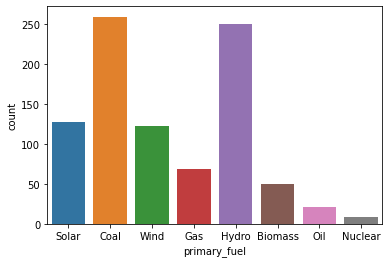

In [14]:
sns.countplot(df.primary_fuel)
df.primary_fuel.value_counts()

#### Checking pair-wise correlation of the numerical columns using a heat map

<AxesSubplot:>

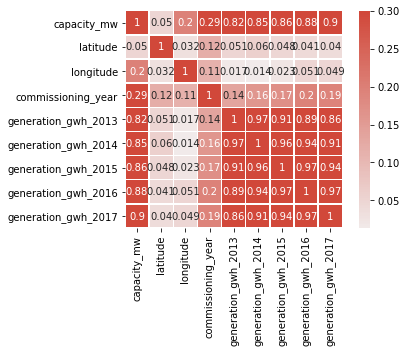

In [15]:
# Generating a custom diverging colormap
cmap = sns.diverging_palette(200, 15, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0, annot=True, square=True, linewidths=.5)

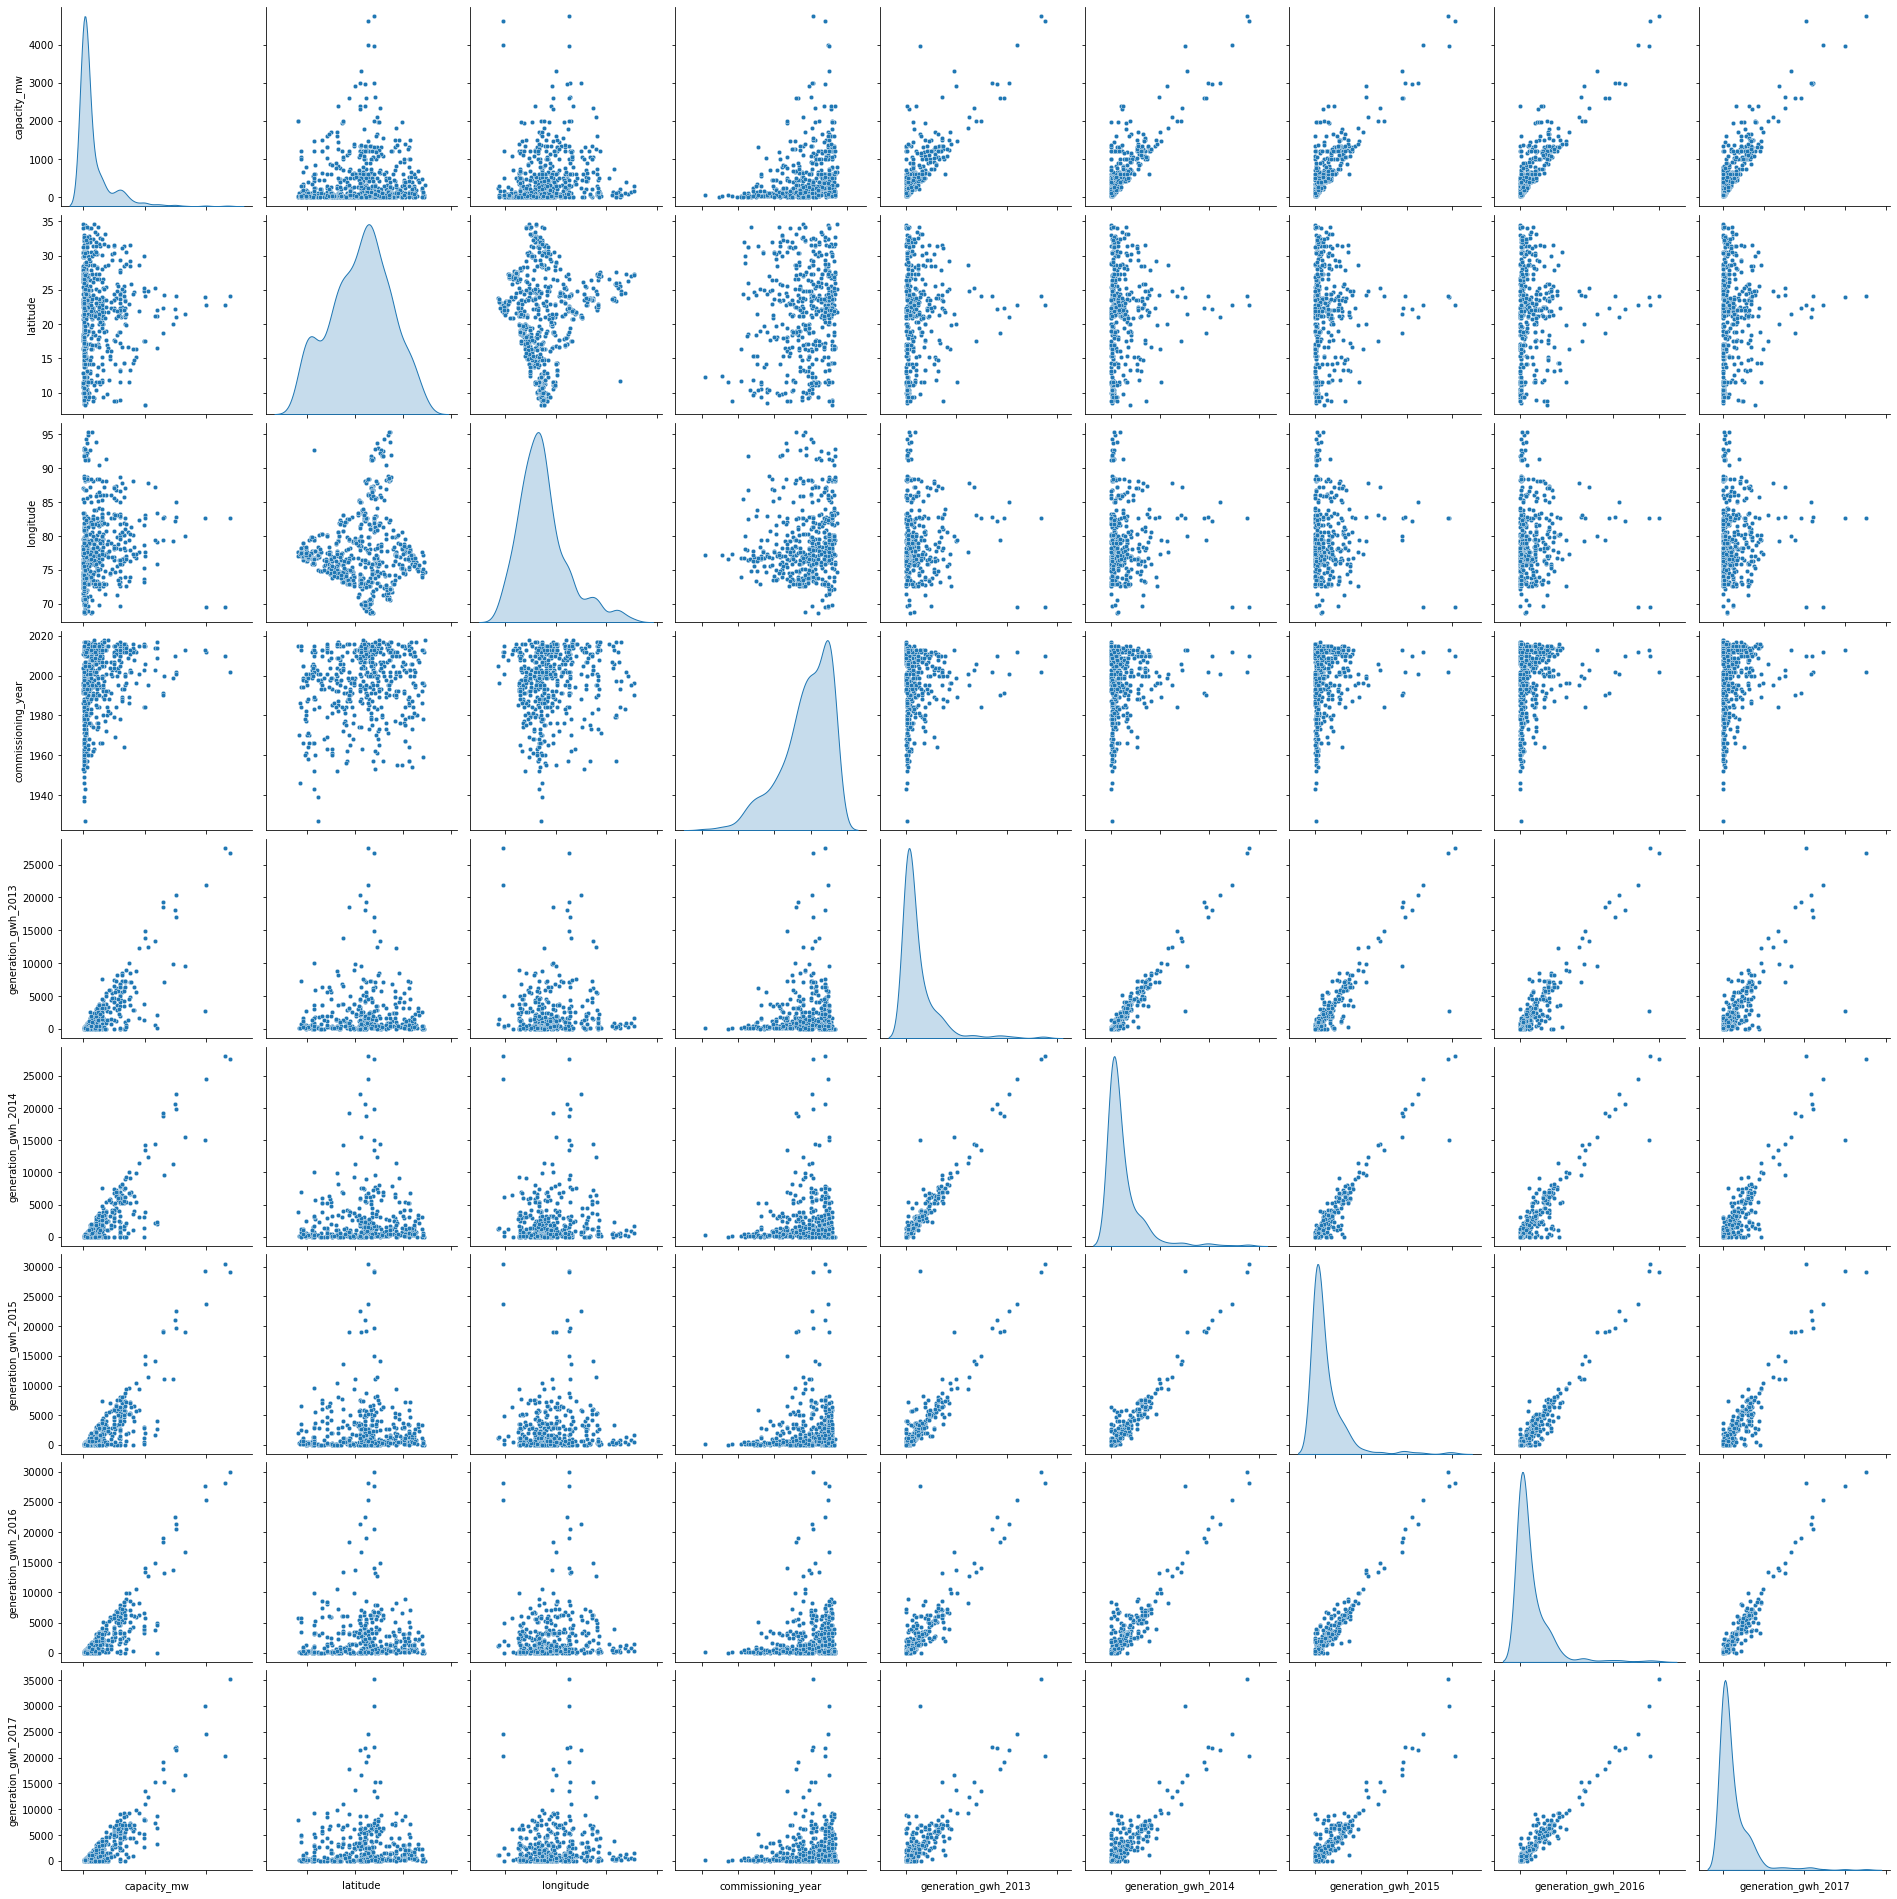

In [16]:
#pair plots of entire dataset
pp = sns.pairplot(df, palette = 'deep', size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

We see that a lot of columns are positively co-related with the capacity_mw. The power generation of the plants across the years is also correlated but that is expected. 

### Let do a year by year analysis of the power generation as follows:

### 2013

<Figure size 864x576 with 0 Axes>

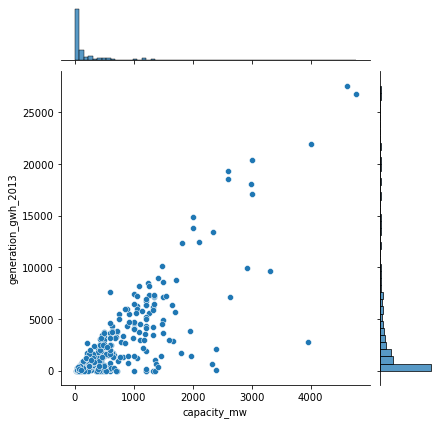

In [17]:
plt.figure(figsize=(12,8))
sns.jointplot(x='capacity_mw', y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

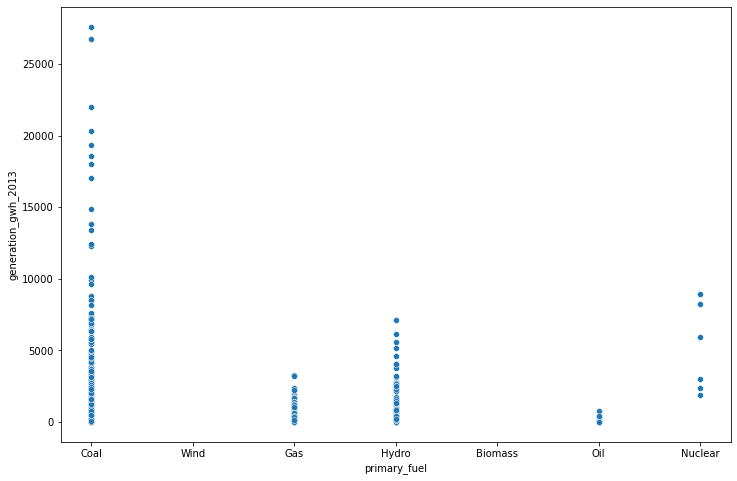

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

In [19]:
df.generation_gwh_2013.describe()

count      384.000000
mean      2304.059202
std       3794.767492
min          0.000000
25%        244.458088
50%        797.063475
75%       2795.021500
max      27586.200000
Name: generation_gwh_2013, dtype: float64

In [20]:
#less than 25th percentile
pd.crosstab(df.primary_fuel,df.generation_gwh_2013<=244.0) 

generation_gwh_2013,False,True
primary_fuel,,
Biomass,50,0
Coal,243,16
Gas,55,14
Hydro,193,57
Nuclear,9,0
Oil,13,8
Solar,127,0
Wind,123,0


In [21]:
pd.crosstab(df.primary_fuel,df.generation_gwh_2013>797.00000)

generation_gwh_2013,False,True
primary_fuel,,
Biomass,50,0
Coal,142,117
Gas,45,24
Hydro,206,44
Nuclear,3,6
Oil,20,1
Solar,127,0
Wind,123,0


Looking at the above plots, we are able to come up with the following conclusions

    1. Coal is the primary fuel which is used in a maximum of plants and this is closely followed by Hydro as primary_fuel. Of these two main fuel types, atleast 30% have a total generation greater than the mean generation across all plants.
    2. Only plants using Coal,Gas,Oil, and Hydro fuel as its primary fuel have a generation of less than 25th percentile as far as 2013 power generation is concerned
    3. Of the plants having power generation less than 100 gigawatt-hours, primary fuel having hydro has the maximum plants followed by coal. Similarly, a plant with Coal has the highest power generation of 27586.200000 gwh
    4. We don't have information on the power generation for plants which use Solar, Wind, or Biomass as their primary fuel

### 2014

<Figure size 864x576 with 0 Axes>

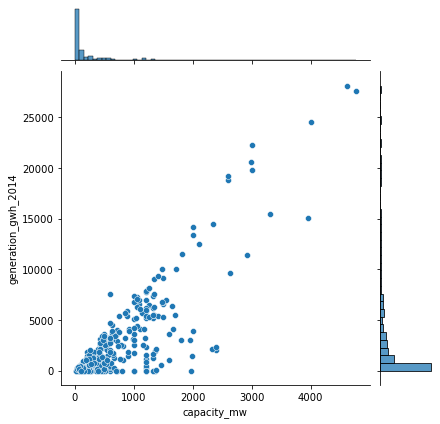

In [22]:
plt.figure(figsize=(12,8))
sns.jointplot(x='capacity_mw', y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

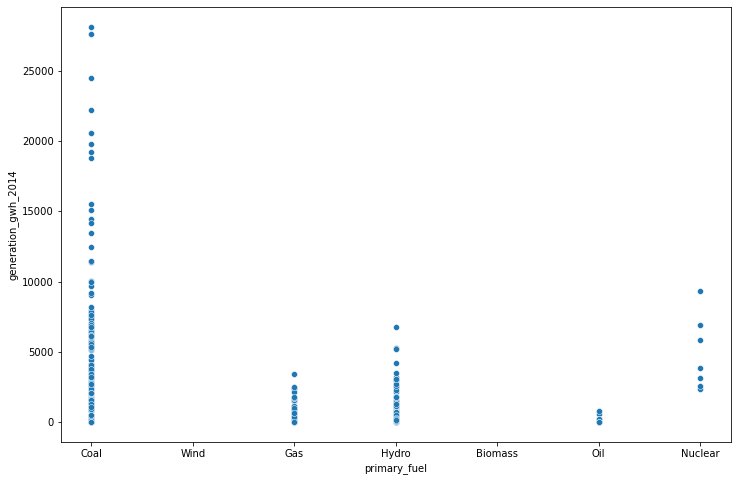

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In [24]:
df.generation_gwh_2014.describe()

count      401.000000
mean      2420.393316
std       4013.558173
min          0.000000
25%        223.650436
50%        805.760000
75%       3034.575000
max      28127.000000
Name: generation_gwh_2014, dtype: float64

In [25]:
#greater than 75th percentile
pd.crosstab(df.primary_fuel,df.generation_gwh_2014>3034.0)

generation_gwh_2014,False,True
primary_fuel,,
Biomass,50,0
Coal,173,86
Gas,68,1
Hydro,241,9
Nuclear,4,5
Oil,21,0
Solar,127,0
Wind,123,0


In [26]:
#plant with no power generation
pd.crosstab(df.primary_fuel,df.generation_gwh_2014==0.0)

generation_gwh_2014,False,True
primary_fuel,,
Biomass,50,0
Coal,248,11
Gas,60,9
Hydro,248,2
Nuclear,9,0
Oil,15,6
Solar,127,0
Wind,123,0


In [27]:
#plant with highest power generation
pd.crosstab(df.primary_fuel,df.generation_gwh_2014==28127.0)

generation_gwh_2014,False,True
primary_fuel,,
Biomass,50,0
Coal,258,1
Gas,69,0
Hydro,250,0
Nuclear,9,0
Oil,21,0
Solar,127,0
Wind,123,0


Looking at the above plots, we are able to come up with the following conclusions

    1. Coal is the primary fuel which is used in a maximum of plants and this is closely followed by Hydro as primary_fuel. Of these two main fuel types, atleast 30% have a total generation greater than the mean generation across all plants.
    2. Only plants using Coal,Gas,Oil, and Hydro fuel as its primary fuel have a generation of more than 75th percentile as far as 2014 power generation is concerned with a majority of plants using Coal as its primary fuel
    3. Of the plants having power generation more than 75 percentile gigawatt-hours of power generation, primary fuel having hydro has the maximum plants followed by coal. Similarly, a plant with Coal has the highest power generation of 28127.00000 gwh 
    4. There are atleast 28 plants which have reported 0 gwh of power generation. This could be because of being shut or not having adequate primary fuel. 

### 2015

<Figure size 864x576 with 0 Axes>

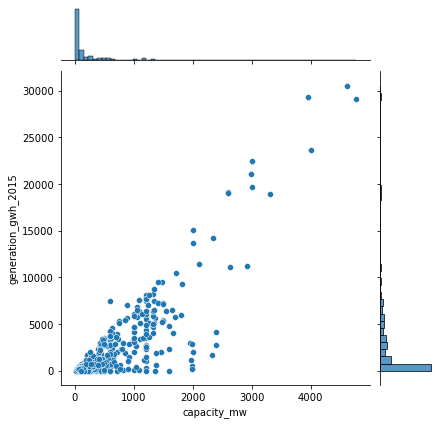

In [28]:
plt.figure(figsize=(12,8))
sns.jointplot(x='capacity_mw', y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

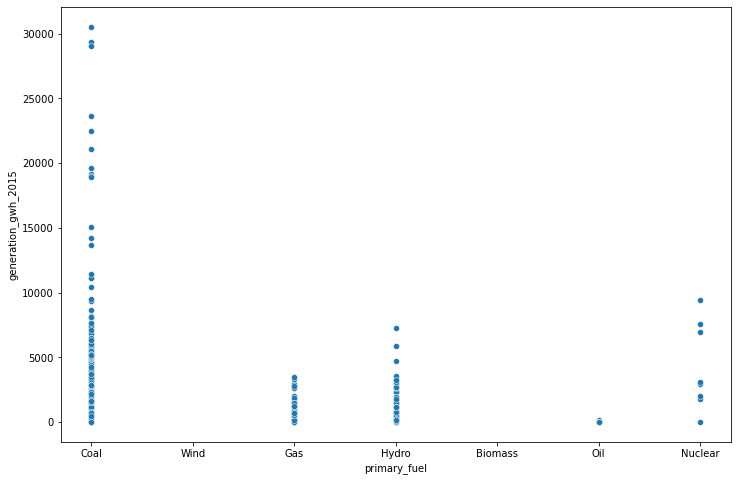

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

In [30]:
#plant with no power generation
pd.crosstab(df.primary_fuel,df.generation_gwh_2015==0.0)

generation_gwh_2015,False,True
primary_fuel,,
Biomass,50,0
Coal,250,9
Gas,62,7
Hydro,246,4
Nuclear,8,1
Oil,14,7
Solar,127,0
Wind,123,0


In [31]:
#plants with more than mean power generation in 2015
pd.crosstab(df.primary_fuel,df.generation_gwh_2016>df.generation_gwh_2016.mean())

generation_gwh_2016,False,True
primary_fuel,,
Biomass,50,0
Coal,145,114
Gas,65,4
Hydro,238,12
Nuclear,3,6
Oil,21,0
Solar,127,0
Wind,123,0


In [32]:
#plants with maximum power generation in 2015
print('Maximum power generation by a plant in 2015 is',df.generation_gwh_2016.max())
pd.crosstab(df.primary_fuel,df.generation_gwh_2016>df.generation_gwh_2016.max()-1)

Maximum power generation by a plant in 2015 is 30015.0


generation_gwh_2016,False,True
primary_fuel,,
Biomass,50,0
Coal,258,1
Gas,69,0
Hydro,250,0
Nuclear,9,0
Oil,21,0
Solar,127,0
Wind,123,0


Looking at the above plots, we are able to come up with the following conclusions

    1. Coal is the primary fuel which is used in a maximum of plants and this is closely followed by Hydro as primary_fuel. Of these two main fuel types, atleast 30% have a total generation greater than the mean generation across all plants.
    2. Only plants using Coal,Gas,Oil, and Hydro fuel as its primary fuel have a generation of more than mean as far as 2015 power generation is concerned with a majority of plants using Coal as its primary fuel. Almost 80% of the plants having greater than the mean have Coal
    3. Of the plants having power generation more than the mean of gigawatt-hours of power generation, primary fuel having coal has the maximum plants followed by hydro. The plant with primary fuel of Coal has the highest power generation of 30015 gwh
    4. There are atleast 28 plants which have reported 0 gwh of power generation. This could be because of being shut or not having adequate primary fuel. Even one nuclear power plant has reported zero power generation 

### 2016

<Figure size 864x576 with 0 Axes>

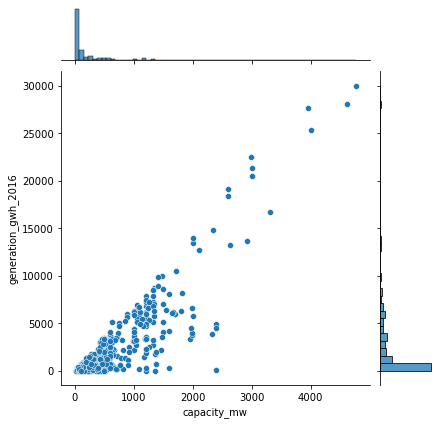

In [33]:
plt.figure(figsize=(12,8))
sns.jointplot(x='capacity_mw', y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

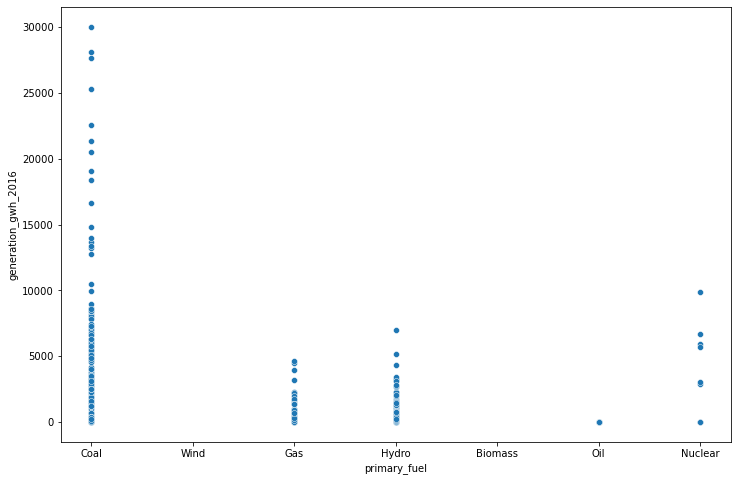

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

In [35]:
#plant with no power generation
pd.crosstab(df.primary_fuel,df.generation_gwh_2016==0.0)

generation_gwh_2016,False,True
primary_fuel,,
Biomass,50,0
Coal,250,9
Gas,60,9
Hydro,248,2
Nuclear,7,2
Oil,12,9
Solar,127,0
Wind,123,0


### 2017

<Figure size 864x576 with 0 Axes>

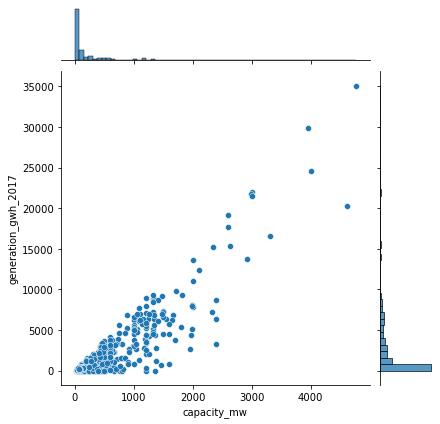

In [36]:
plt.figure(figsize=(12,8))
sns.jointplot(x='capacity_mw', y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

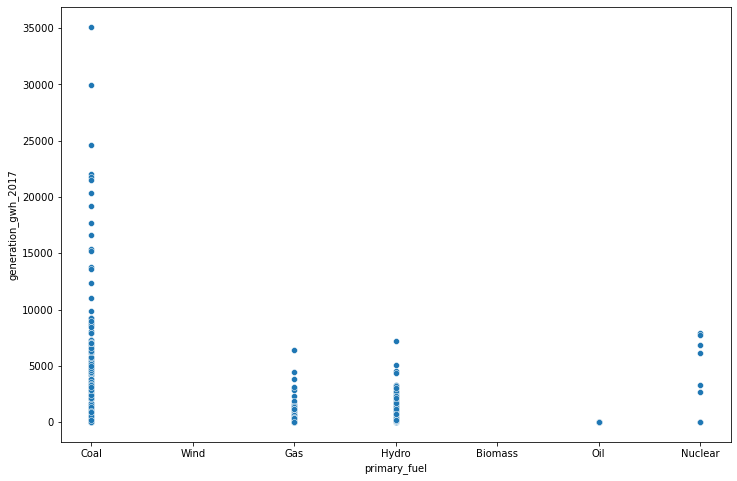

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

Text(0.5, 1.0, '2016 vs 2017 - power generation comparison')

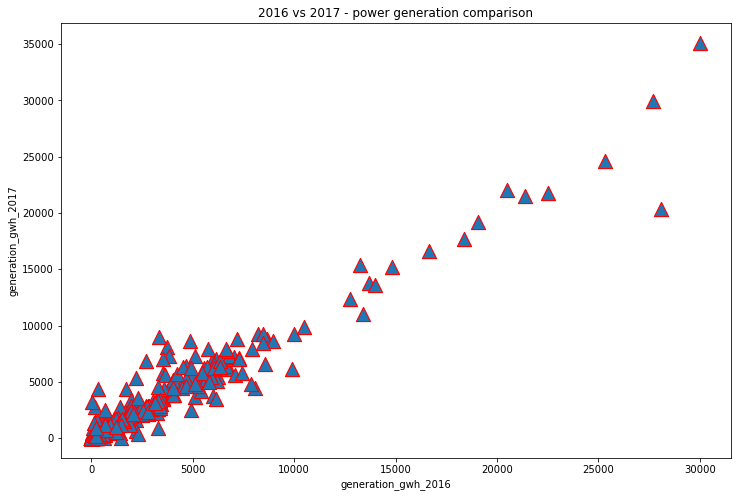

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.generation_gwh_2016,y=df.generation_gwh_2017
                ,linewidths = 2,marker ="^",edgecolor ="red",s = 200)
plt.title('2016 vs 2017 - power generation comparison')

Over the last 2 years for which we have data, we are able to draw the following conclusions:
    
    1. Maximum power generation increased from around 30000(in 2016) to 35000 in 2017. 
    2. Coal held the top spot as far as power generation was concerned. A maximum number of plants which generated high power had either coal or hydro as a primary fuel.
    
Some conclusion based on the data from the past 5 year

    1. Coal plants generated the maximum power across all years
    2. Wind and solar hardly generated any power across the years
    3. Oil-based power plants are limited and at a maximum a power plan generates less than 1000 mwh/year

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

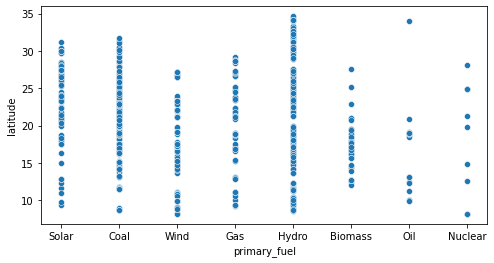

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

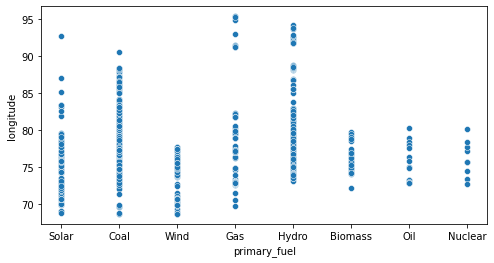

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='longitude',data=df)

In [41]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Looking at the geolocation source, we are able to see that WRI is the major source.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          199 non-null    object 
 5   commissioning_year   528 non-null    float64
 6   source               908 non-null    object 
 7   geolocation_source   889 non-null    object 
 8   generation_gwh_2013  384 non-null    float64
 9   generation_gwh_2014  401 non-null    float64
 10  generation_gwh_2015  425 non-null    float64
 11  generation_gwh_2016  437 non-null    float64
 12  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


In [43]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


## Feature Engineering

In [44]:
#Using LabelEncoder for convering categorical to numerical columns

In [45]:
#Updating dependancies
from sklearn.preprocessing import LabelEncoder

In [46]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [47]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [48]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

We see that a majority of the other fuels in the "other_fuel1" column are missing and we can drop this column 

In [49]:
lb = LabelEncoder()
df['primary_fuel'] = lb.fit_transform(df['primary_fuel'])
df['source'] = lb.fit_transform(df['source'])

In [50]:
df['geolocation_source'] = lb.fit_transform(df['geolocation_source'])

In [51]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [52]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [53]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [54]:
##outliers removal using z-score technique
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))

df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [55]:
df1.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

In [56]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df1)                       

PowerTransformer()

In [57]:
df1.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

## Machine learning algorithms

### Taking the capacity_mw as the target variable - Regression problem

In [58]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,1,60.0,174,2,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,7,60.0,21,2,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [59]:
#Splitting the features and label
x=df1.drop(['capacity_mw'],axis=1)
y=df1['capacity_mw']

In [60]:
#Scaling the X data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
print("Features ",x.shape,"\nLabel",y.shape)

Features  (885, 11) 
Label (885,)


In [61]:
#Updating dependancies
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [62]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=93)

In [63]:
x_train.shape

(708, 11)

In [64]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
LR_predict=LR.predict(x_test)

In [65]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 42579.2860032925
MAE: 125.85933766000372
r2_score: 0.505955860534065


In [66]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_predict=RF.predict(x_test)

In [67]:
print('MSE:',mean_squared_error(RF_predict,y_test))
print('MAE:',mean_absolute_error(RF_predict,y_test))
print('r2_score:',r2_score(RF_predict,y_test))

MSE: 29188.088729743224
MAE: 90.90269832956355
r2_score: 0.7667099167641828


In [68]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
DTR_PRED=DTR.predict(x_test)

In [69]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 61659.817808005646
MAE: 123.84018644067794
r2_score: 0.6498340137149126


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

GBr=GradientBoostingRegressor()
GBr.fit(x_train,y_train)
GBr_Pred = GBr.predict(x_test)

In [71]:
print('MSE:',mean_squared_error(GBr_Pred,y_test))
print('MAE:',mean_absolute_error(GBr_Pred,y_test))
print('r2_score:',r2_score(GBr_Pred,y_test))

MSE: 27324.069886578956
MAE: 93.44915295264714
r2_score: 0.8008875229264614


### Hyper parameter tuning using GridSearch CV

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 7, 9, 11, 13]}

In [73]:
rfr = RandomForestRegressor()
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                        cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [74]:
g_search.fit(x_train,y_train)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 9}


In [75]:
rfr_bm = RandomForestRegressor(bootstrap = True, max_depth = None, max_features = 'log2', n_estimators = 13)

In [76]:
rfr_bm.fit(x_train,y_train)

RandomForestRegressor(max_features='log2', n_estimators=13)

In [77]:
RFBM_predict = rfr_bm.predict(x_test)

In [78]:
print('MSE:',mean_squared_error(RFBM_predict,y_test))
print('MAE:',mean_absolute_error(RFBM_predict,y_test))
print('r2_score:',r2_score(RFBM_predict,y_test))

MSE: 25535.777052017722
MAE: 87.11974371585626
r2_score: 0.807667875330954


### Conclusion

    Even after hyper parameter tuning the RandomForestRegressor model, we are unable to achieve a better accuracy than GradientBoostingRegressor. Therefore, we can confirm that Random Forest Regressor is the best model for the "capacity_mw" - target variable

#### Saving the best model

In [79]:
best_model = GradientBoostingRegressor()

In [80]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [81]:
best_model.score(x_test,y_test)

0.8320297867328065

In [82]:
# saving the best model for the capacity_mw - 
import joblib
joblib.dump(best_model,'GlobalPower-capacity.pkl')

['GlobalPower-capacity.pkl']

### Taking the Primary Fuel as the target variable 

In [83]:
y = df1['primary_fuel']
x = df1.drop(columns = ['primary_fuel'])

In [84]:
y.value_counts()

3    250
1    236
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [85]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [86]:
y.value_counts()

7    250
6    250
5    250
4    250
3    250
2    250
1    250
0    250
Name: primary_fuel, dtype: int64

In [87]:
#Updating dependancies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [89]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_randomstate = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.2,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>max_accuracy:
       max_accuracy=acc
       max_randomstate = i
print ("Best accuracy is", max_accuracy, "for the Random state of", max_randomstate)

Best accuracy is 0.72 for the Random state of 192


In [90]:
#Creating test train split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.2,random_state = max_randomstate)

In [91]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))

0.72
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        55
           1       0.57      0.33      0.41        52
           2       0.58      0.47      0.52        45
           3       0.40      0.35      0.37        46
           4       0.71      0.77      0.74        44
           5       0.59      0.79      0.67        42
           6       1.00      1.00      1.00        58
           7       0.91      1.00      0.95        58

    accuracy                           0.72       400
   macro avg       0.69      0.70      0.69       400
weighted avg       0.70      0.72      0.70       400



In [92]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()
DTree.fit(x_train,y_train)
preddt = DTree.predict(x_test)
print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))

0.8675
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.64      0.62      0.63        52
           2       0.78      0.78      0.78        45
           3       0.79      0.74      0.76        46
           4       0.91      0.89      0.90        44
           5       0.84      0.88      0.86        42
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        58

    accuracy                           0.87       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400



In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))

0.9125
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       0.84      0.73      0.78        52
           2       0.74      0.93      0.82        45
           3       0.86      0.70      0.77        46
           4       0.98      0.95      0.97        44
           5       0.95      0.95      0.95        42
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        58

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



In [94]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7675
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.81      0.42      0.56        52
           2       0.58      0.62      0.60        45
           3       0.58      0.33      0.42        46
           4       0.78      0.89      0.83        44
           5       0.58      0.90      0.70        42
           6       1.00      1.00      1.00        58
           7       0.87      1.00      0.93        58

    accuracy                           0.77       400
   macro avg       0.76      0.76      0.74       400
weighted avg       0.77      0.77      0.75       400



In [95]:
#Cross-Validation for the model
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, x, y, cv=5)
rwr1=cross_val_score(DTree, x, y, cv=5)
rwr2=cross_val_score(rf, x, y, cv=5)
rwr3=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())
print("Cross validation score of Decision-Tree Classifier model :", rwr1.mean())
print("Cross validation score of Random Forest Classifier model :", rwr2.mean())
print("Cross validation score of Support Vector Classifier  model :", rwr3.mean())

Cross validation score of LogisticRegression model : 0.554
Cross validation score of Decision-Tree Classifier model : 0.8724999999999999
Cross validation score of Random Forest Classifier model : 0.9199999999999999
Cross validation score of Support Vector Classifier  model : 0.5029999999999999


### Hyper parameter tuning using GridSearch CV

In [96]:
from sklearn.model_selection import GridSearchCV

parameters_list = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [97]:
GridCV=GridSearchCV(RandomForestClassifier(),parameters_list,cv=5,n_jobs=1)

In [98]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [99]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [100]:
best_model = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'log2', n_estimators= 200)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,predrf))

0.8775
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       0.84      0.73      0.78        52
           2       0.74      0.93      0.82        45
           3       0.86      0.70      0.77        46
           4       0.98      0.95      0.97        44
           5       0.95      0.95      0.95        42
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        58

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



#### Conclusions

    1. We were unable to improve the accuracy after hyper-parameter tuning. 
    2. After cross-validation of the models, we are able to confirm that the Random Forest Classifier is the best model.

#### Saving the best model 


In [104]:
import pickle
filename = 'GlobalPower-primaryfuel.pkl'
pickle.dump(rf, open(filename, 'wb'))